___
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F4.bp.blogspot.com%2F-OQZGt_5WqDo%2FWa_Dfa4U15I%2FAAAAAAAAAUI%2FveRmAmUUKFA19dVw6XCOV2YLO6n-y_omwCLcBGAs%2Fs1600%2Fout.jpg&f=1&nofb=1&ipt=1dd6a02de0e3c13ae4585e7abf56f5191364c82f5f94af05007bc3e46a5d8866" width="200px" height="180px" />


# <font color= #bbc28d> **Fashion MNIST** </font>
#### <font color= #2E9AFE> `Project 1 - Machine Learning`</font>
- <Strong> Sofía Maldonado, Diana Valdivia, Samantha Sánchez, Isa Valladolid & Viviana Toledo </Strong>
- <Strong> Fecha </Strong>: 21/09/2025.

___

<p style="text-align:right;"> Image retrieved from: https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F4.bp.blogspot.com%2F-OQZGt_5WqDo%2FWa_Dfa4U15I%2FAAAAAAAAAUI%2FveRmAmUUKFA19dVw6XCOV2YLO6n-y_omwCLcBGAs%2Fs1600%2Fout.jpg&f=1&nofb=1&ipt=1dd6a02de0e3c13ae4585e7abf56f5191364c82f5f94af05007bc3e46a5d8866</p>

# <font color= #bbc28d> **Data Preprocessing** </font>

In [2]:
# Librerías Generales
import numpy as np
from tensorflow.keras import datasets

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Pytorch CNN
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision import datasets as torchdata
import time

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Contamos con 60,000 datos de entrenamiento y 10,000 datos de prueba

>  
> !! Quieren dividir en train-test-dev??? 
>  

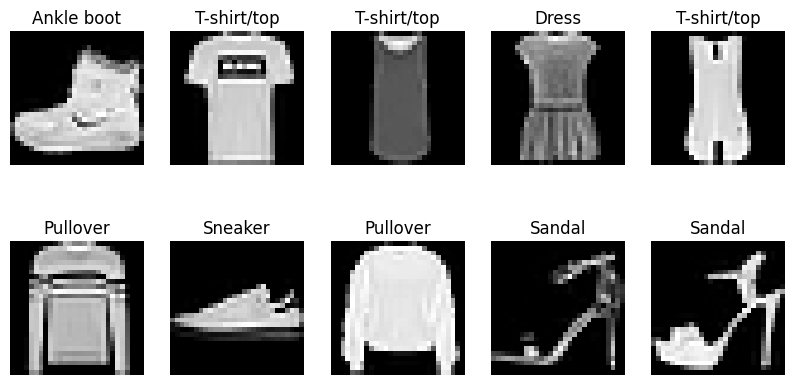

In [3]:
# Visualize the images
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()

### <font color= #84a7b3> • **Image Standarization** </font>

### <font color= #84a7b3> • **Noise Insertion** </font>

# <font color= #bbc28d> **Logistic Regression** </font>

# <font color= #bbc28d> **SVM** </font>

# <font color= #bbc28d> **Random Forest Classifier** </font>

# <font color= #bbc28d> **Multilayered Perceptron** </font>

# <font color= #bbc28d> **Convolutional Neural Network** </font>

In [24]:
# Checking GPU access
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "dont")
print(device)

True
cuda


In [1]:
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)

NameError: name 'torch' is not defined

In [25]:
# Transformation pipeline to turn images into tensors, and normalizing said images (DIFERENTE A LA QUE VAMOS A USAR PARA LAS PRUEBAS!!!!!!!!!!!!!!!)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
])

In [26]:
# Loading the data

train_data = torchdata.FashionMNIST(root='./Data', train=True, download=True, transform=transform)
test_data = torchdata.FashionMNIST(root='./Data', train=False, download=True, transform=transform)

BATCH_SIZE = 64

trainloader = DataLoader(train_data, batch_size= BATCH_SIZE, shuffle=True)
testloader = DataLoader(test_data, batch_size= BATCH_SIZE, shuffle=True)

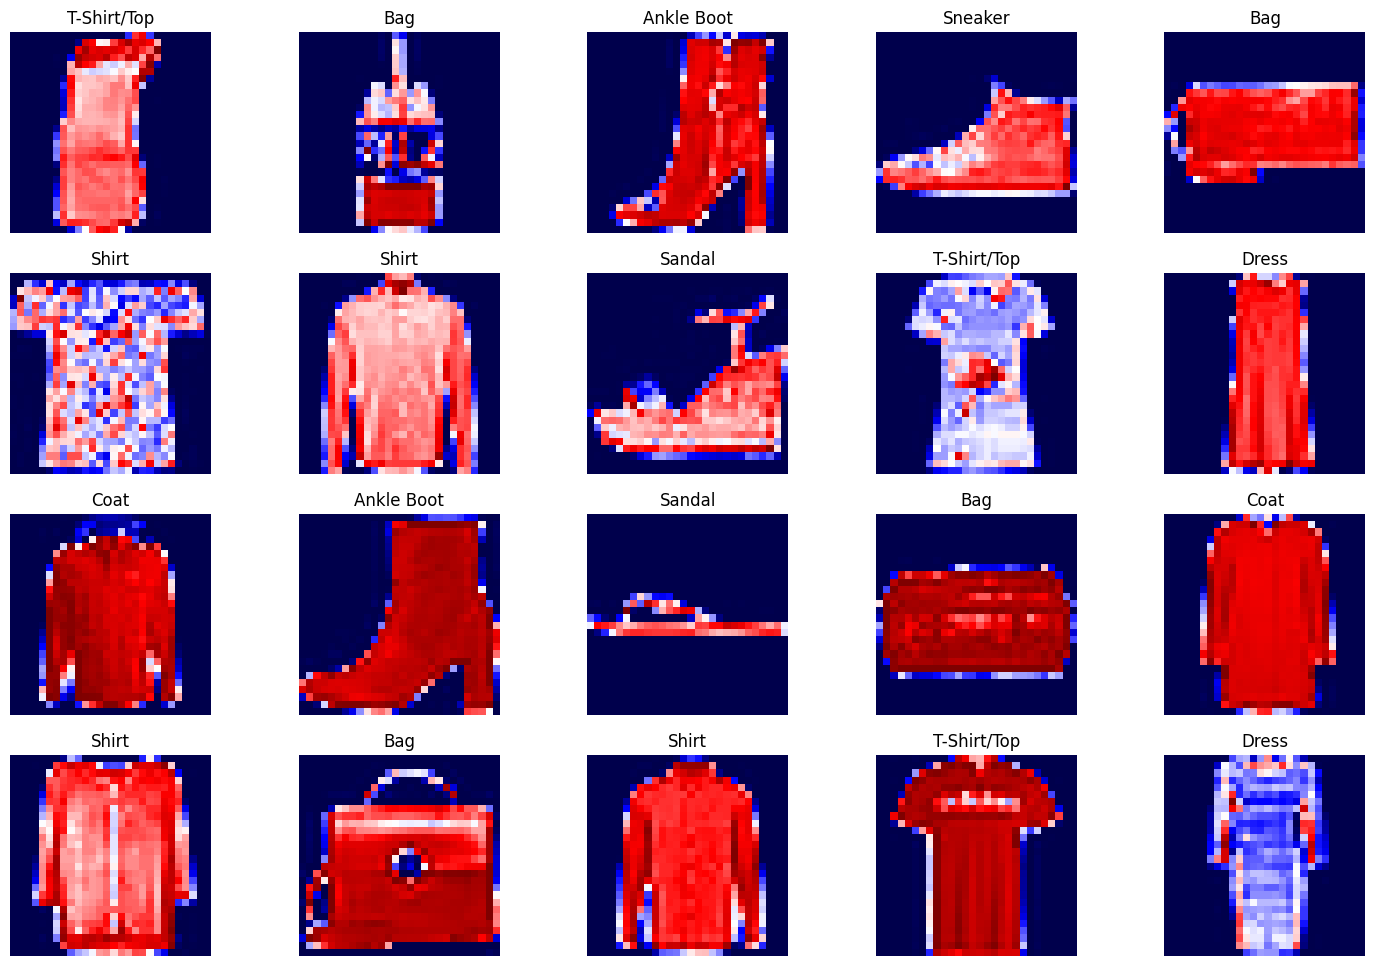

In [27]:
# Pre-Viz of the images
class_names = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

images, labels = next(iter(trainloader))

preview = plt.figure(figsize=(18,12))
for i in range(20):
    ax = preview.add_subplot(4, 5, i+1)
    ax.imshow(np.squeeze(images[i].numpy()), cmap='seismic')
    ax.set_title(class_names[labels[i].item()])
    ax.axis('off')
plt.show()

In [ ]:
# Defining the model architecture

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size= 3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.25)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = CNN().to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [29]:
# Training model

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Lists for visualization later
train_loss = []

# Training loop

EPOCHS = 7 # Doing trial and error testing, 7 appears to be the sweet spot in the number of epochs to avoid overfitting the model
for epoch in range(EPOCHS):
    start_time = time.time()
    model.train()
    running_loss = 0
    for i, (images, labels) in enumerate(trainloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    training_loss = running_loss/len(trainloader)
    train_loss.append(training_loss)
    
    print(f'Epoch: {epoch + 1}. Loss {training_loss:.2f}. Time Taken: {(time.time() - start_time):.2f}')

Epoch: 1. Loss 0.60. Time Taken: 12.84
Epoch: 2. Loss 0.41. Time Taken: 13.33
Epoch: 3. Loss 0.36. Time Taken: 12.88
Epoch: 4. Loss 0.33. Time Taken: 13.25
Epoch: 5. Loss 0.30. Time Taken: 13.28
Epoch: 6. Loss 0.29. Time Taken: 13.03
Epoch: 7. Loss 0.27. Time Taken: 13.05


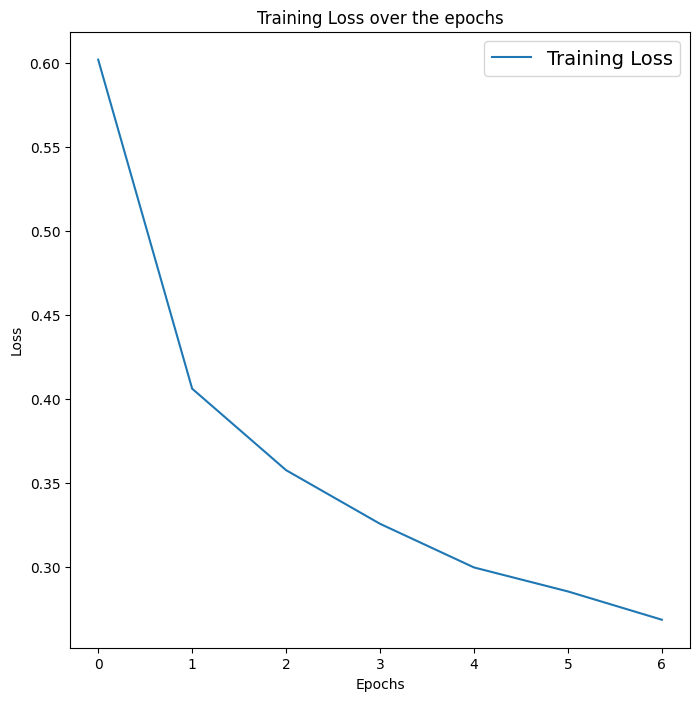

In [30]:
# Training loss over time

plt.figure(figsize=(8,8))
plt.title("Training Loss over the epochs")
plt.plot(train_loss, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(fontsize=14)

In [31]:
# Model evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * (correct / total)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 90.6500
